## Урок № 6. Градиентный бустинг (AdaBoost)

### Задание № 1.
Для реализованной модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [4]:
X, y = load_diabetes(return_X_y=True)

In [7]:
X.shape, y.shape

((442, 10), (442,))

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [19]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [20]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [21]:
def bias(y, z):
    return (y - z)

In [23]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        # базовый алгоритм
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [69]:
# Число деревьев в ансамбле
n_trees = 3

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [70]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [71]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2166.2635061927717
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4401.030983536639


In [72]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [73]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

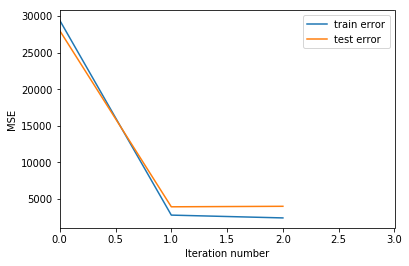

In [74]:
get_error_plot(n_trees, train_errors, test_errors)

*Расчёт для eta=1*

In [121]:
num_trees = 99

max_depth = 3

eta = 1

train_errors = []
test_errors = []
for n_trees in range(3, num_trees+1, 3):
    coefs = [1] * n_trees
    trees, temp_train_errors, temp_test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    print(f'Расчёт для {n_trees:>2} деревьев выполнен. Ошибка на трейне = {temp_train_errors[-1]:>8.3f}, \
ошибка на тесте = {temp_test_errors[-1]:>8.3f}')
    train_errors.append(temp_train_errors[-1])
    test_errors.append(temp_test_errors[-1])

Расчёт для  3 деревьев выполнен. Ошибка на трейне = 2430.921, ошибка на тесте = 4017.452
Расчёт для  6 деревьев выполнен. Ошибка на трейне = 1701.694, ошибка на тесте = 4625.099
Расчёт для  9 деревьев выполнен. Ошибка на трейне = 1241.385, ошибка на тесте = 4958.327
Расчёт для 12 деревьев выполнен. Ошибка на трейне =  950.176, ошибка на тесте = 5248.296
Расчёт для 15 деревьев выполнен. Ошибка на трейне =  749.949, ошибка на тесте = 5339.687
Расчёт для 18 деревьев выполнен. Ошибка на трейне =  611.317, ошибка на тесте = 5383.181
Расчёт для 21 деревьев выполнен. Ошибка на трейне =  533.088, ошибка на тесте = 5409.274
Расчёт для 24 деревьев выполнен. Ошибка на трейне =  407.213, ошибка на тесте = 5536.701
Расчёт для 27 деревьев выполнен. Ошибка на трейне =  334.138, ошибка на тесте = 5391.758
Расчёт для 30 деревьев выполнен. Ошибка на трейне =  264.265, ошибка на тесте = 5681.544
Расчёт для 33 деревьев выполнен. Ошибка на трейне =  198.933, ошибка на тесте = 5867.049
Расчёт для 36 деревье

In [119]:
def get_error_for_n_trees_plot(n_trees, train_err, test_err):
    plt.xlabel('Number of trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees+5)
    plt.plot(list(range(3, n_trees+1, 3), train_err, label='train error')
    plt.plot(list(range(3, n_trees+1, 3), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

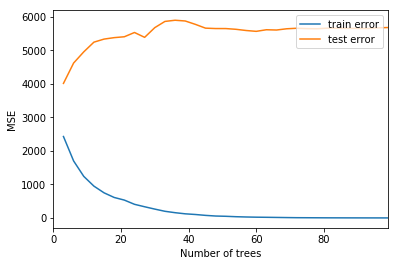

In [122]:
get_error_for_n_trees_plot(num_trees, train_errors, test_errors)

*Расчёт для eta=0.1*

In [79]:
num_trees = 99

max_depth = 3

eta = 0.1

train_errors = []
test_errors = []
for n_trees in range(3, num_trees+1, 3):
    coefs = [1] * n_trees
    trees, temp_train_errors, temp_test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    print(f'Расчёт для {n_trees:>2} деревьев выполнен. Ошибка на трейне = {temp_train_errors[-1]:>8.3f}, \
ошибка на тесте = {temp_test_errors[-1]:>8.3f}')
    train_errors.append(temp_train_errors[-1])
    test_errors.append(temp_test_errors[-1])

Расчёт для  3 деревьев выполнен. Ошибка на трейне = 20269.842, ошибка на тесте = 19424.732
Расчёт для  6 деревьев выполнен. Ошибка на трейне = 12006.519, ошибка на тесте = 11855.891
Расчёт для  9 деревьев выполнен. Ошибка на трейне = 7517.431, ошибка на тесте = 7968.077
Расчёт для 12 деревьев выполнен. Ошибка на трейне = 5060.252, ошибка на тесте = 5815.524
Расчёт для 15 деревьев выполнен. Ошибка на трейне = 3692.062, ошибка на тесте = 4689.654
Расчёт для 18 деревьев выполнен. Ошибка на трейне = 2909.216, ошибка на тесте = 4029.255
Расчёт для 21 деревьев выполнен. Ошибка на трейне = 2433.764, ошибка на тесте = 3769.910
Расчёт для 24 деревьев выполнен. Ошибка на трейне = 2137.991, ошибка на тесте = 3599.874
Расчёт для 27 деревьев выполнен. Ошибка на трейне = 1949.534, ошибка на тесте = 3539.436
Расчёт для 30 деревьев выполнен. Ошибка на трейне = 1789.168, ошибка на тесте = 3513.172
Расчёт для 33 деревьев выполнен. Ошибка на трейне = 1686.062, ошибка на тесте = 3519.357
Расчёт для 36 дер

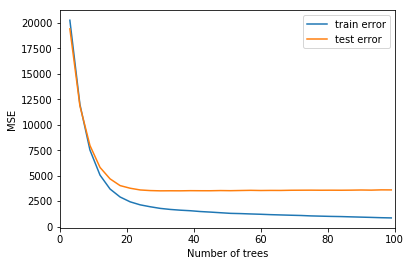

In [118]:
get_error_for_n_trees_plot(num_trees, train_errors, test_errors)

*Расчёт для eta=1*

In [143]:
n_trees = 50

max_depth = 10

coefs = [1] * n_trees

eta = 1

train_errors = []
test_errors = []
for val_depth in range(3, max_depth+1):
    trees, temp_train_errors, temp_test_errors = gb_fit(n_trees, val_depth, X_train, X_test, y_train, y_test, coefs, eta)
    
    print(f'Расчёт для глубины деревьев {val_depth:>2} выполнен. Ошибка на трейне = {temp_train_errors[-1]:>8.3f}, \
ошибка на тесте = {temp_test_errors[-1]:>8.3f}')
    
    train_errors.append(temp_train_errors[-1])
    test_errors.append(temp_test_errors[-1])

Расчёт для глубины деревьев  3 выполнен. Ошибка на трейне =   50.997, ошибка на тесте = 5656.073
Расчёт для глубины деревьев  4 выполнен. Ошибка на трейне =    0.806, ошибка на тесте = 6792.681
Расчёт для глубины деревьев  5 выполнен. Ошибка на трейне =    0.003, ошибка на тесте = 5870.023
Расчёт для глубины деревьев  6 выполнен. Ошибка на трейне =    0.000, ошибка на тесте = 6465.551
Расчёт для глубины деревьев  7 выполнен. Ошибка на трейне =    0.000, ошибка на тесте = 6401.245
Расчёт для глубины деревьев  8 выполнен. Ошибка на трейне =    0.000, ошибка на тесте = 6167.835
Расчёт для глубины деревьев  9 выполнен. Ошибка на трейне =    0.000, ошибка на тесте = 5660.555
Расчёт для глубины деревьев 10 выполнен. Ошибка на трейне =    0.000, ошибка на тесте = 5818.407


In [141]:
def get_error_for_max_depth_plot(val_depth, train_err, test_err):
    plt.xlabel('Maximum depth of trees')
    plt.ylabel('MSE')
    plt.xlim(2, val_depth+1)
    plt.plot(list(range(3, val_depth+1)), train_err, label='train error')
    plt.plot(list(range(3, val_depth+1)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

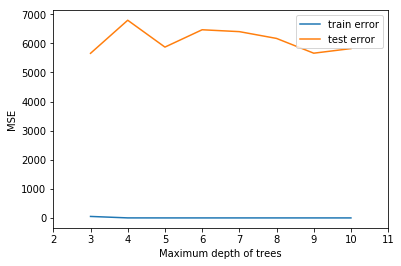

In [144]:
get_error_for_max_depth_plot(max_depth, train_errors, test_errors)

*Расчёт для eta=0.1*

In [148]:
n_trees = 50

max_depth = 15

coefs = [1] * n_trees

eta = 0.1

train_errors = []
test_errors = []
for val_depth in range(3, max_depth+1):
    trees, temp_train_errors, temp_test_errors = gb_fit(n_trees, val_depth, X_train, X_test, y_train, y_test, coefs, eta)
    
    print(f'Расчёт для глубины деревьев {val_depth:>2} выполнен. Ошибка на трейне = {temp_train_errors[-1]:>8.3f}, \
ошибка на тесте = {temp_test_errors[-1]:>8.3f}')
    
    train_errors.append(temp_train_errors[-1])
    test_errors.append(temp_test_errors[-1])

Расчёт для глубины деревьев  3 выполнен. Ошибка на трейне = 1325.311, ошибка на тесте = 3527.254
Расчёт для глубины деревьев  4 выполнен. Ошибка на трейне =  705.979, ошибка на тесте = 3525.501
Расчёт для глубины деревьев  5 выполнен. Ошибка на трейне =  306.111, ошибка на тесте = 3436.894
Расчёт для глубины деревьев  6 выполнен. Ошибка на трейне =  121.687, ошибка на тесте = 3662.873
Расчёт для глубины деревьев  7 выполнен. Ошибка на трейне =   25.061, ошибка на тесте = 3495.928
Расчёт для глубины деревьев  8 выполнен. Ошибка на трейне =    6.129, ошибка на тесте = 4124.959
Расчёт для глубины деревьев  9 выполнен. Ошибка на трейне =    2.071, ошибка на тесте = 4928.038
Расчёт для глубины деревьев 10 выполнен. Ошибка на трейне =    1.062, ошибка на тесте = 4035.094
Расчёт для глубины деревьев 11 выполнен. Ошибка на трейне =    1.045, ошибка на тесте = 4280.192
Расчёт для глубины деревьев 12 выполнен. Ошибка на трейне =    0.981, ошибка на тесте = 3739.968
Расчёт для глубины деревьев 13

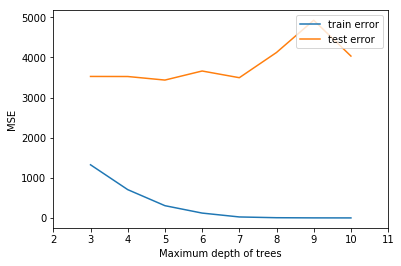

In [147]:
get_error_for_max_depth_plot(max_depth, train_errors, test_errors)